In [1]:
import os
from typing import Dict, NamedTuple, Union, List, Tuple
from itertools import combinations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Config(NamedTuple):
    data: str = "../dsd_result_formatted.csv"
    dirctory: str = "../images/dataviz"
    savefile: bool = False
    kwarg_savefig: Dict[str, Union[str, int, float]] = {
        "facecolor": "white",
        "dpi": 300,
        "bbox_inches": "tight",
        "pad_inches": 0.05
    }

In [3]:
conf = Config(savefile=True)

In [4]:
os.makedirs(conf.dirctory, exist_ok=True)

In [5]:
# load result data

data_raw = pd.read_csv(conf.data, index_col=0)
d_mat = data_raw.iloc[:, 1:]
r_mat = data_raw.iloc[: ,0]

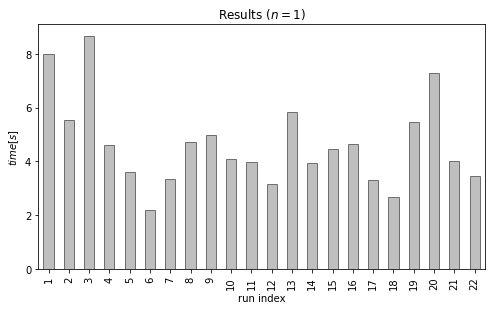

In [6]:
fig, ax = plt.subplots(figsize=(8, 4.5))

r_mat.plot.bar(
    xlabel="run index", ylabel="$time [s]$",
    title="Results $(n=1)$", color="gray", edgecolor="k",
    alpha=0.5
)

if conf.savefile:
    plt.savefig(f"{conf.dirctory}/barplot.png", **conf.kwarg_savefig)

In [7]:
def interaction(
    data: pd.core.frame.DataFrame, 
    dim: int,
    subtract_scale: bool = True,
    name_digit: int = 3
    ) -> pd.core.frame.DataFrame:

    assert isinstance(dim, int) and dim >= 1, \
        f"dim expected non-zero positive int; got {dim}"
    assert isinstance(name_digit, int) and name_digit >= 0, \
        f"name_digit expected positive int; got {name_digit}"
    assert data.shape[1] >= dim, \
        f"""
        dim expected <= data.shape[1];
        got 
        dim: {dim}
        shape of data: {data.shape}

        if you want to have interactions of features ** n,
        use power() method ahead of this process
        """
    
    temp = data.copy()
    ret = pd.DataFrame(index=temp.index)
    temp.columns = data.columns if not subtract_scale \
        else [f"({name}-{data.mean()[i].round(name_digit)})" for i, name in enumerate(data.columns)]

    for i in range(dim):
        l_comb = list(combinations(temp.columns, i + 1))
        l_df_comb = [ret] + [
            pd.DataFrame(
                temp.loc[:, list(comb)].cumprod(axis=1).iloc[:, -1].values,
                index = temp.index,
                columns = ["*".join(comb)]
            ) for comb in l_comb
            ]
        ret = pd.concat(l_df_comb, axis=1)
    return ret

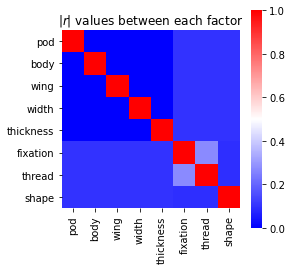

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.heatmap(
    d_mat.corr().abs(), cmap="bwr", square=True, ax=ax
)

ax.set(title = "$|r|$ values between each factor")

if conf.savefile:
    plt.savefig(f"{conf.dirctory}/main_effect.png", **conf.kwarg_savefig)

In [9]:
dim = 2

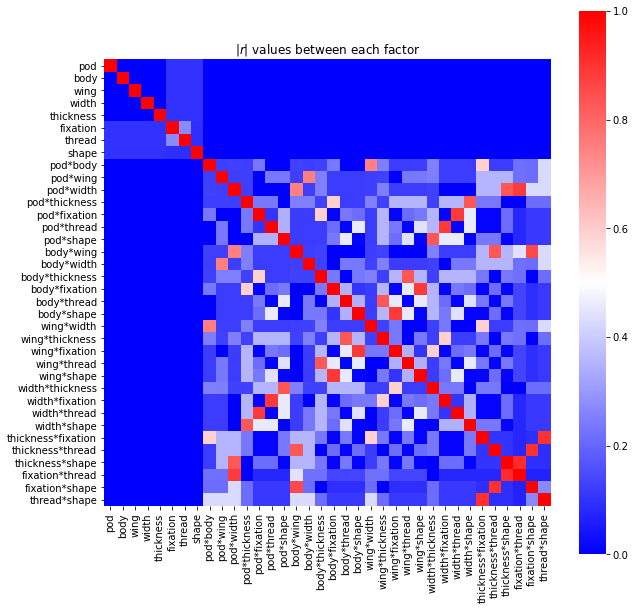

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    interaction(d_mat, dim, False).corr().abs(),
    cmap="bwr", square=True, ax=ax
)

ax.set(title = "$|r|$ values between each factor")

if conf.savefile:
    plt.savefig(f"{conf.dirctory}/{dim}D_interaction.png", **conf.kwarg_savefig)

In [11]:
dim = 3

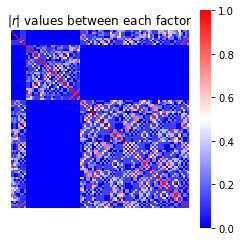

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.heatmap(
    interaction(d_mat, dim, False).corr().abs(),
    cmap="bwr", square=True, ax=ax,
    xticklabels=False, yticklabels=False
)

ax.set(title = "$|r|$ values between each factor")

if conf.savefile:
    plt.savefig(f"{conf.dirctory}/{dim}D_interaction.png", **conf.kwarg_savefig)